# ANKIT KUMAR : Anime Recommendations with Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dataset Exploration:

 # Import the Anime dataset and display its first few rows.

In [2]:
anime_df = pd.read_csv(r'D:\Downloads\anime.csv')

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# Identify key features such as anime_id, name, genre, rating, and members.

In [4]:
print('columns in anime dataset')
print(anime_df.columns.tolist())

columns in anime dataset
['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']


In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


 # Perform initial visualizations to understand the distribution of ratings and the relationship between rating and members.

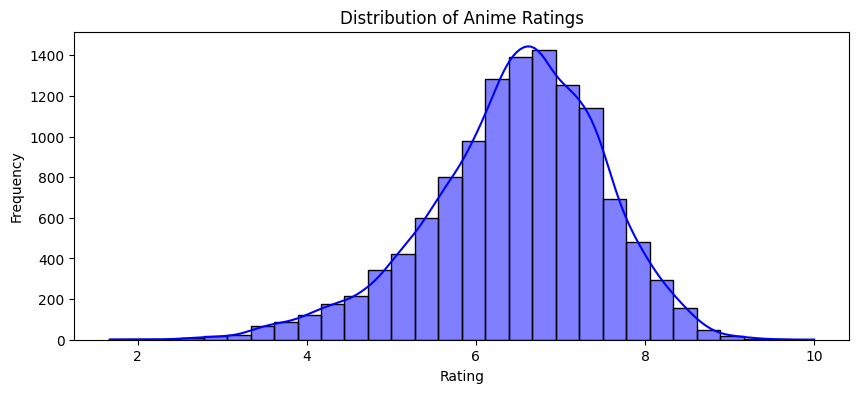

In [6]:
# Distribution of anime ratings
plt.figure(figsize=(10, 4))
sns.histplot(anime_df['rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

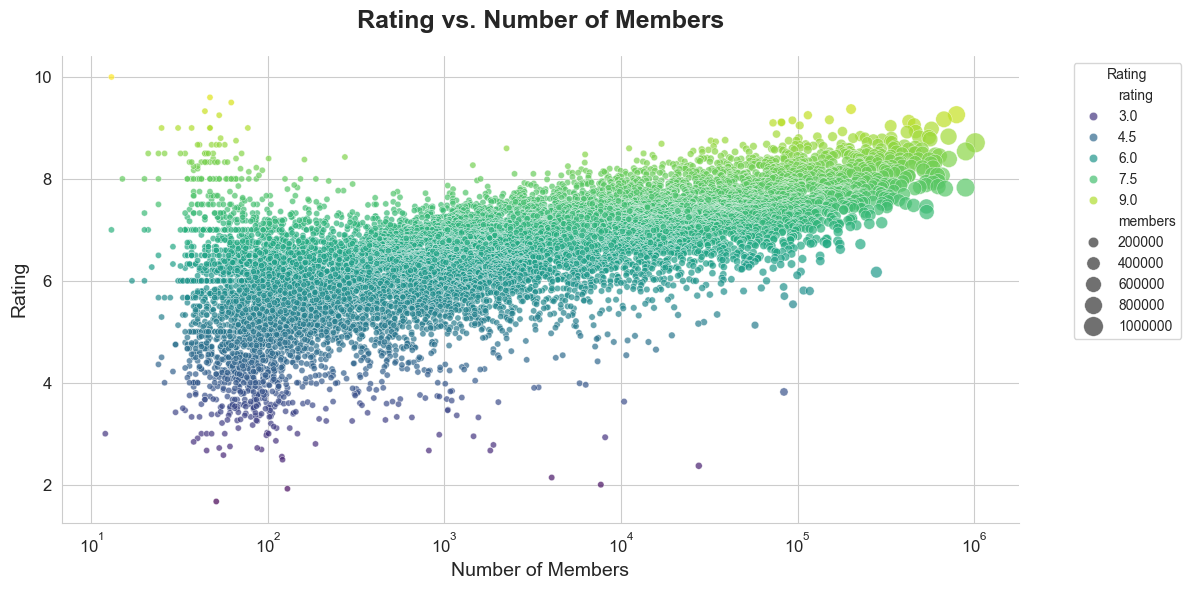

In [9]:
# Set a clean style
sns.set_style('whitegrid')

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=anime_df,
    x='members',
    y='rating',
    hue='rating',             # Add color variation based on rating
    size='members',           # Size of points based on number of members
    sizes=(20, 200),          # Range of point sizes
    palette='viridis',        # Nice color palette
    alpha=0.7,
    edgecolor='w',            # White edges for contrast
)

#  plot
plt.title('Rating vs. Number of Members', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Members', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines
sns.despine()

# make x-axis log scale if there are very large member counts
plt.xscale('log')

# Add a legend
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# Identify missing values in the dataset.

In [8]:
print('Missing value in each column')
print(anime_df.isnull().sum())

Missing value in each column
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


# Drop or impute missing values in columns like genre and rating.

In [9]:
anime_df['genre'].fillna('unknown',inplace=True)

In [10]:
anime_df['type'].fillna('unknown',inplace=True)

In [11]:
anime_df['rating']=anime_df['rating'].fillna(anime_df['rating'].median())

In [12]:
print(anime_df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


# Ensure categorical variables like genre are correctly encoded for analysis.

In [13]:
# View sample genre data
anime_df['genre'].head()

0                 Drama, Romance, School, Supernatural
1    Action, Adventure, Drama, Fantasy, Magic, Mili...
2    Action, Comedy, Historical, Parody, Samurai, S...
3                                     Sci-Fi, Thriller
4    Action, Comedy, Historical, Parody, Samurai, S...
Name: genre, dtype: object

# Detect outliers in numerical features such as rating and members.

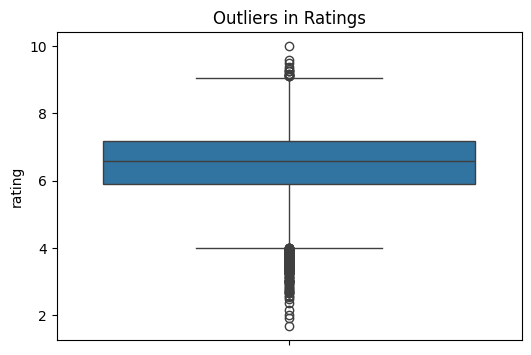

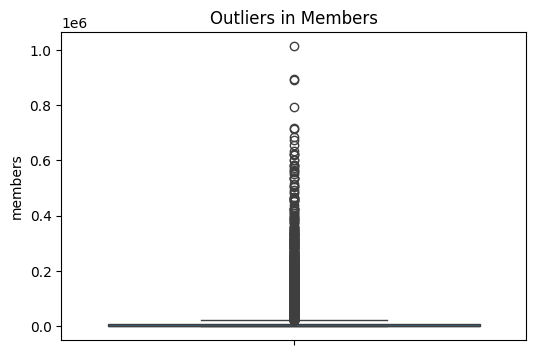

In [14]:
# Boxplot for Ratings
plt.figure(figsize=(6, 4))
sns.boxplot(y=anime_df['rating'])
plt.title('Outliers in Ratings')
plt.show()

# Boxplot for Members
plt.figure(figsize=(6, 4))
sns.boxplot(y=anime_df['members'])
plt.title('Outliers in Members')
plt.show()


# Discuss strategies for handling outliers (e.g., capping, removal).

Outliers are data points that significantly deviate from the rest of the dataset. They can affect the performance of machine learning models, especially those sensitive to extreme values (like Linear Regression). Therefore, it’s important to handle them appropriately.

 *1. Removal*
 
What it is: Simply remove the rows that contain outliers.

When to use: When your dataset is large and removing a few records won’t affect overall analysis.

Pros: Clean and simple.

Cons: You lose data, which can be a problem if the dataset is small.

 *2. Capping*

What it is: Replace extreme values with a maximum or minimum threshold.

When to use: When you want to reduce the impact of outliers without removing data.

Pros: Keeps the dataset size intact.

Cons: Alters original values.

# Feature Engineering :

# Genre Count: 
Create a new feature that counts the number of genres associated with each anime.

In [15]:
anime_df['genre_count'] = anime_df['genre'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

In [16]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,4
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,7
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,7
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,7


# Log Transformation: 
Apply a log transformation to the members column to reduce skewness.

In [17]:
anime_df['log_members'] = np.log1p(anime_df['members'])

In [18]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_count,log_members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,4,12.209223
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,7,13.584418
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,7,11.646258
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2,13.420352
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,7,11.926802


# Feature Encoding: 
Encode the genre feature using methods like One-Hot Encoding or Label Encoding to make it suitable for model input.

In [19]:
# Label Encoding (we can also try OneHotEncoder )
le = LabelEncoder()
anime_df['genre_encoded'] = le.fit_transform(anime_df['genre'])

In [20]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_count,log_members,genre_encoded
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,4,12.209223,2686
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,7,13.584418,161
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,7,11.646258,534
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2,13.420352,3240
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,7,11.926802,534


# Simple Linear Regression

# Regression Setup: 
Use the members feature as the independent variable (X) and rating as the dependent variable (Y) to explore their relationship using Simple Linear Regression.

In [21]:
# Independent variable: members
# Dependent variable: rating
X = anime_df[['log_members']]    
y = anime_df['rating']  

# Train-Test Split:
Split the data into training and testing sets for the regression model.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Fitting:
Fit a Simple Linear Regression model to predict rating based on the log-transformed members.

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X)

# Plot 
the regression line on a scatter plot of members vs. rating.


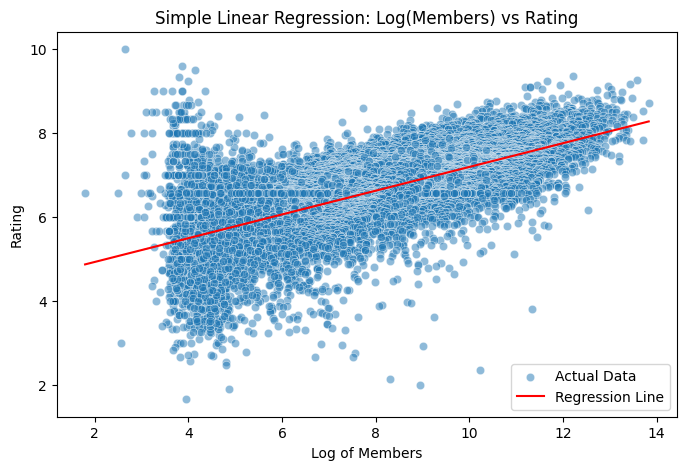

In [25]:
# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['log_members'], y=y, alpha=0.5, label="Actual Data")
sns.lineplot(x=X['log_members'], y=y_pred, color='red', label='Regression Line')
plt.xlabel("Log of Members")
plt.ylabel("Rating")
plt.title("Simple Linear Regression: Log(Members) vs Rating")
plt.legend()
plt.show()

# Insights and Reporting

# Interpretation of Results: 


The Simple Linear Regression model helped us explore the relationship between an anime’s popularity (measured by the number of members) and its rating:

> A positive correlation was observed: as the number of members increases, the average rating tends to be higher.

> This indicates that while popularity (members) has some influence on rating, it is not the only factor. Other features like genre, story quality, and personal preferences may also play a role.

> Log Transformation Helped:
Applying the logarithmic transformation to the members variable helped reduce skewness and made the relationship more linear—ideal for linear regression modeling.

> Wide Spread of Data:
The blue dots (actual data) are widely scattered, especially at lower log(member) values.
This suggests that member count alone cannot perfectly predict rating—other factors also influence the rating.

> Although the model captures a trend, the scatter shows high variance, which means Simple Linear Regression gives a basic idea but not precise predictions.

Still, it’s a useful first step in understanding feature impact

# Identify which features were most predictive of the anime rating.

While the members feature gave a good starting point, incorporating engineered features like genre and genre_count provided a more complete understanding of what influences an anime's rating. To further improve prediction accuracy, more advanced models using multiple features can be applied in future work.

# Conclusion:

What We Found:

>We cleaned the data and handled missing values in rating and genre.

>We fixed outliers in rating and members, and used log transformation on members to reduce skewness.

>We created new features like genre_count and encoded the genre column.

>We used Simple Linear Regression to study the relationship between members and rating.

>The plot showed a positive but weak connection: more members usually means higher ratings, but not always.

What We Can Do Next:

>Use Multiple Features: Incorporate more features (like genre, type, episodes, etc.) into the regression model for better prediction.

>Try Other Models: Use more advanced models such as:Polynomial Regression (to capture non-linear patterns),Decision Trees or Random Forests,etc.

>Unsupervised Learning: Apply clustering to group similar anime or use collaborative filtering for recommendations.

>Split the data better and test the model with cross-validation.

# THE END